<a href="https://colab.research.google.com/github/jainkhere/cs480student/blob/main/CS480_Assignment_4_Kunal_Jain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

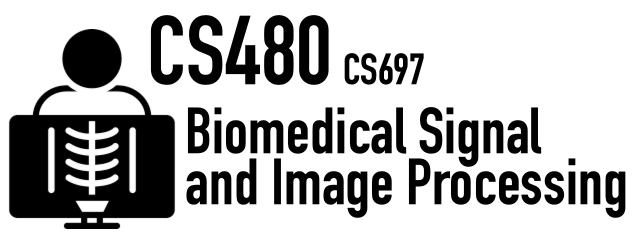
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt

In [3]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7 MB 4.3 MB/s 


In [4]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [5]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [6]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [7]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [8]:
# TODO: Please display this image and print the dimensions!

In [9]:
# TODO: YOUR CODE

In [10]:
img.shape

(1858, 2090)

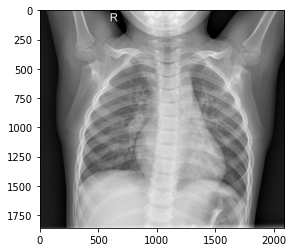

In [11]:
plt.imshow(img, cmap='gray')

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [12]:
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

In [13]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape
  
  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [14]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [15]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) YOUR ANSWER -> imresize - Resize each image to 300 X 300 dimension
# TODO: Operation 2) YOUR ANSWER -> Create a 3D array for all normal and pneumonia images respectively. Each element in 3D array is a collection of resized images. 

In [16]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [17]:
# TODO: YOUR CODE

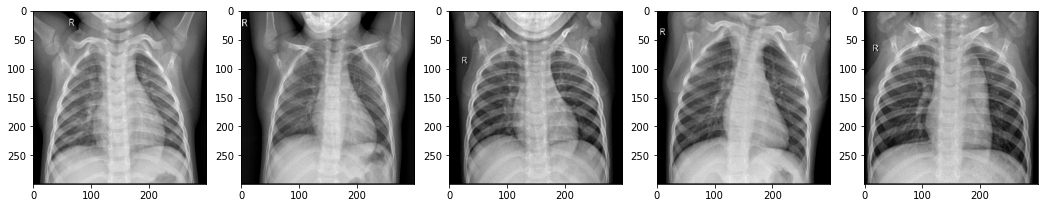

In [18]:
#subplot(r,c) provide the no. of rows and columns
f, images_subplot = plt.subplots(1,5, figsize=(18,18)) 

for i in range(5):
  images_subplot[i].imshow(normal_images[i], cmap='gray')

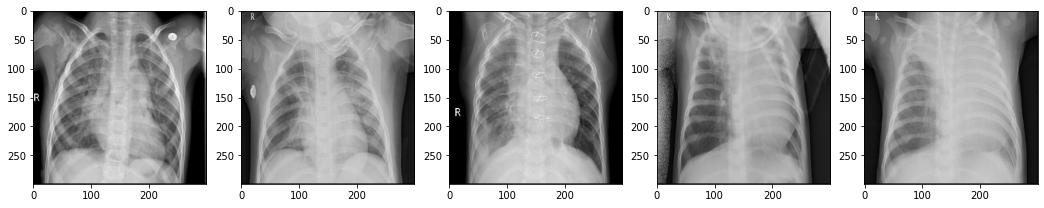

In [19]:
#subplot(r,c) provide the no. of rows and columns
f, images_subplot = plt.subplots(1,5, figsize=(18,18)) 

for i in range(5):
  images_subplot[i].imshow(pneumonia_images[i], cmap='gray')

**Task 3:** Setup training and testing data. [15 Points]

In [20]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [21]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [22]:
training_data.shape

(120, 90000)

In [23]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target_normal = np.zeros(TRAINING_COUNT)
training_target_pneumonia = np.ones(TRAINING_COUNT)
training_target = np.concatenate((training_target_normal, training_target_pneumonia))

In [24]:
training_target_normal = np.zeros(TRAINING_COUNT)
training_target_pneumonia = np.ones(TRAINING_COUNT)
training_target = np.concatenate((training_target_normal, training_target_pneumonia))

In [25]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [26]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.

In [27]:
testing_target_normal = np.zeros(TESTING_COUNT)
testing_target_pneumonia = np.ones(TESTING_COUNT)
testing_target = np.concatenate((testing_target_normal, testing_target_pneumonia))

In [28]:
training_target.shape

(120,)

In [29]:
testing_target.shape

(80,)

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [30]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [31]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [32]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [33]:
# TODO: YOUR ANSWER

In [34]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9375

In [35]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [36]:
# TODO: YOUR ANSWER

With a score of 0.9375, accuracy of classification is very good.

**Bonus:** Let's take a closer look! [33 Points]

In [37]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [38]:
# TODO: YOUR CODE AND YOUR ANSWER

In [39]:
predictions = clf.predict(testing_data)

Misclassified images

In [89]:
misclassified = np.where(testing_target != predictions)[0]

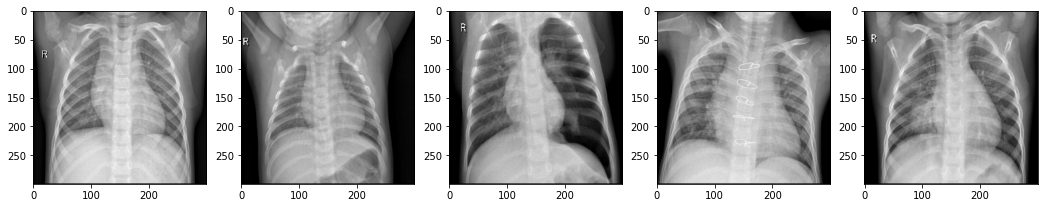

In [90]:
f, images_subplot = plt.subplots(1,len(misclassified), figsize=(18,18)) 
for i in range(len(misclassified)):
    images_subplot[i].imshow(np.resize(testing_data[misclassified[i]], (300, 300)), cmap='gray')

I'm not sure why above images are misclassified. Maybe the lungs are not visible clearly because of noise in these images and so these are misclassfied.

Correctly classified images

In [91]:
classified = np.where(testing_target == predictions)[0]

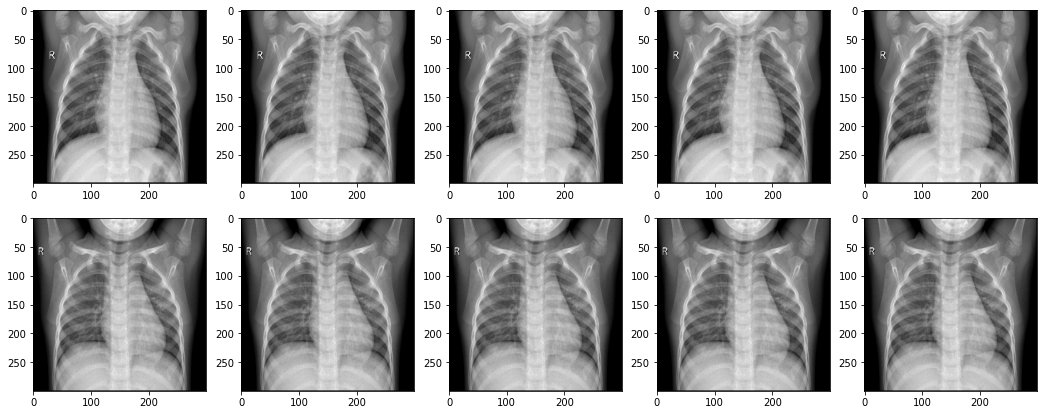

In [99]:
f, images_subplot = plt.subplots(2,5, figsize=(18,7)) 
for i in range(2):
  for j in range(5):
    images_subplot[i][j].imshow(np.resize(testing_data[classified[i]], (300, 300)), cmap='gray')

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [ ]:
# TODO: YOUR ANSWER

Preparing the data in a better format might help in improving the classifier performance.

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw